<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/GDSTK_Space_Filling_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdstk hilbertcurve

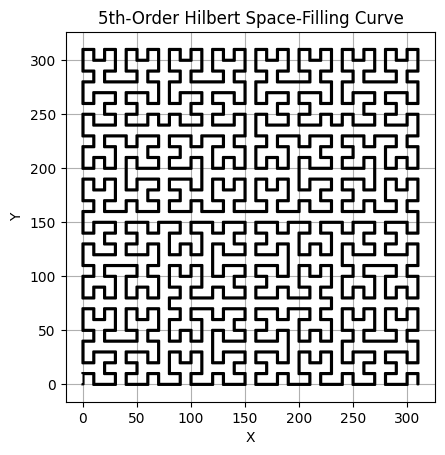

In [4]:
import gdstk
import matplotlib.pyplot as plt
import numpy as np
from hilbertcurve.hilbertcurve import HilbertCurve

# Parameters
order = 5  # Order of the Hilbert curve
dimension = 2  # 2D Hilbert curve
line_width = 1  # Width of the path, in microns by default
step = 10  # Scaling factor for spacing between points

# Initialize Hilbert curve
hilbert_curve = HilbertCurve(order, dimension)
num_points = 2 ** (order * dimension)

# Generate points along the Hilbert curve
points = [hilbert_curve.point_from_distance(i) for i in range(num_points)]
scaled_points = [(x * step, y * step) for x, y in points]

# Create a FlexPath with the specified line width
path = gdstk.FlexPath(scaled_points, line_width)

# Create a cell and add the path
cell = gdstk.Cell("HILBERT")
cell.add(path)

# Create a library and add the cell
lib = gdstk.Library()
lib.add(cell)

# Save to a GDSII file
lib.write_gds("hilbert_curve.gds")

# Plot using matplotlib
fig, ax = plt.subplots()
for polygon in path.to_polygons():
    x, y = zip(*polygon.points)
    ax.plot(x, y, 'k-')
ax.set_aspect('equal')
plt.title("5th-Order Hilbert Space-Filling Curve")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [5]:
from google.colab import files
files.download("hilbert_curve.gds")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

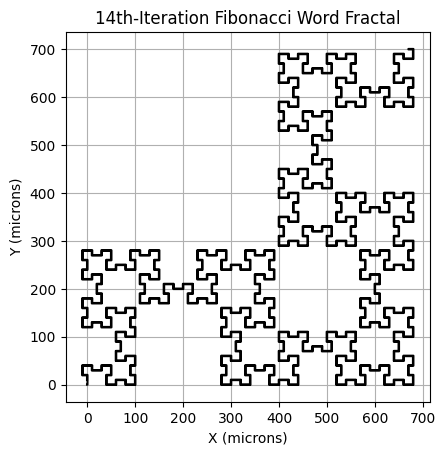

In [8]:
import gdstk
import numpy as np
import matplotlib.pyplot as plt

# Parameters
iteration = 14
line_width = 1.0  # in microns
step = 10.0  # step size in microns

# Generate the Fibonacci word
def generate_fibonacci_word(n):
    a, b = "0", "01"
    for _ in range(n - 1):
        a, b = b, b + a
    return b

fib_word = generate_fibonacci_word(iteration)

# Directions: 0=right, 1=up, 2=left, 3=down
directions = [np.array([1, 0]), np.array([0, 1]),
              np.array([-1, 0]), np.array([0, -1])]

# Initialize starting point and direction
current_pos = np.array([0.0, 0.0])
direction = 0  # Start facing right
points = [tuple(current_pos)]

# Apply drawing rules
for idx, char in enumerate(fib_word):
    if char == '1':
        current_pos += directions[direction] * step
    else:
        if idx % 2 == 0:
            direction = (direction + 1) % 4  # Turn left
        else:
            direction = (direction - 1) % 4  # Turn right
        current_pos += directions[direction] * step
    points.append(tuple(current_pos))

# Create FlexPath
path = gdstk.FlexPath(points, line_width)

# Create cell and library
cell = gdstk.Cell("FIBONACCI_FRACTAL")
cell.add(path)
lib = gdstk.Library()
lib.add(cell)

# Write to GDSII file
lib.write_gds("fibonacci_fractal.gds")

# Plot using matplotlib
fig, ax = plt.subplots()
for polygon in path.to_polygons():
    x, y = zip(*polygon.points)
    ax.plot(x, y, 'k-')
ax.set_aspect('equal')
plt.title("14th-Iteration Fibonacci Word Fractal")
plt.xlabel("X (microns)")
plt.ylabel("Y (microns)")
plt.grid(True)
plt.show()

In [9]:
from google.colab import files
files.download("fibonacci_fractal.gds")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

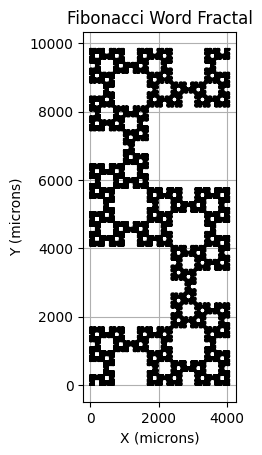

In [13]:
import gdstk
import numpy as np
import matplotlib.pyplot as plt

# Parameters
iteration = 22
line_width = 1.0  # in microns
step = 10.0  # step size in microns

# Generate the Fibonacci word
def generate_fibonacci_word(n):
    a, b = "0", "01"
    for _ in range(n - 1):
        a, b = b, b + a
    return b

fib_word = generate_fibonacci_word(iteration)

# Directions: 0=right, 1=up, 2=left, 3=down
directions = [np.array([1, 0]), np.array([0, 1]),
              np.array([-1, 0]), np.array([0, -1])]

# Initialize starting point and direction
current_pos = np.array([0.0, 0.0])
direction = 0  # Start facing right
points = [tuple(current_pos)]

# Apply drawing rules
for idx, char in enumerate(fib_word):
    if char == '1':
        current_pos += directions[direction] * step
    else:
        if idx % 2 == 0:
            direction = (direction + 1) % 4  # Turn left
        else:
            direction = (direction - 1) % 4  # Turn right
        current_pos += directions[direction] * step
    points.append(tuple(current_pos))

# Create FlexPath
path = gdstk.FlexPath(points, line_width)

# Create cell and library
cell = gdstk.Cell("FIBONACCI_FRACTAL")
cell.add(path)
lib = gdstk.Library()
lib.add(cell)

# Write to GDSII file
lib.write_gds("dense_fibonacci_fractal.gds")

# Plot using matplotlib
fig, ax = plt.subplots()
for polygon in path.to_polygons():
    x, y = zip(*polygon.points)
    ax.plot(x, y, 'k-')
ax.set_aspect('equal')
plt.title("Fibonacci Word Fractal")
plt.xlabel("X (microns)")
plt.ylabel("Y (microns)")
plt.grid(True)
plt.show()

In [14]:
from google.colab import files
files.download("dense_fibonacci_fractal.gds")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>